In [1]:
import numpy as np

In [5]:
#reshape : 1차원 데이터 - 2차원 데이터로 변경 
temp = np.arange(10)
temp2 = np.reshape(temp, (2, -1)) #(-1,-1)은 안됨
print(temp2)

[[0 1 2 3 4]
 [5 6 7 8 9]]


In [9]:
#2차원 데이터 -> 1차원으로
temp = np.arange(16).reshape(4,4)
temp2 = np.reshape(temp, (-1))
print(temp2)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]


In [10]:
#1차원 -> 3차원
temp = np.arange(24)
temp2 = np.reshape(temp,(2,3,4))
print(temp)
print(temp2)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
[[[ 0  1  2  3]
  [ 4  5  6  7]
  [ 8  9 10 11]]

 [[12 13 14 15]
  [16 17 18 19]
  [20 21 22 23]]]


In [20]:
#배열 관련 통계 기능
a = np.random.randint(0,100,(100,))
b = a.reshape(20,5)
# print(a.mean())

print(b.mean(axis = 1)) #1 = row
print(len(b.mean(axis = 1))) # 0 = column
print(b.mean(axis = 0))
print(len(b.mean(axis = 0)))

[52.2 34.2 50.  58.  47.6 30.2 56.4 57.6 42.6 38.2 34.2 27.6 64.2 44.4
 62.  53.6 46.6 43.2 29.8 47.4]
20
[47.7  38.85 45.6  48.   49.85]
5


In [21]:
#데이터를 무조건 1차원으로 만드는 2개의 함수
#flatten, ravel

M = np.arange(9).reshape(3,3)
O = M.flatten()

print(M)
print(O)

[[0 1 2]
 [3 4 5]
 [6 7 8]]
[0 1 2 3 4 5 6 7 8]


In [25]:
M = np.arange(27).reshape(3,3,3)
O = M.flatten()

print(M)
print(O)
print(M)

[[[ 0  1  2]
  [ 3  4  5]
  [ 6  7  8]]

 [[ 9 10 11]
  [12 13 14]
  [15 16 17]]

 [[18 19 20]
  [21 22 23]
  [24 25 26]]]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26]
[[[ 0  1  2]
  [ 3  4  5]
  [ 6  7  8]]

 [[ 9 10 11]
  [12 13 14]
  [15 16 17]]

 [[18 19 20]
  [21 22 23]
  [24 25 26]]]


In [24]:
#ravel
M = np.arange(9).reshape(3,3)
O = M.ravel()

print(M)
print(O)
print(M)

[[0 1 2]
 [3 4 5]
 [6 7 8]]
[0 1 2 3 4 5 6 7 8]
[[0 1 2]
 [3 4 5]
 [6 7 8]]


In [27]:
#flatten과 ravel의 차이
M = np.arange(9).reshape(3,3)
print(M) #변경되기 전

O = M.flatten()
O[0] = -10

print(M) #변경된 후
print(O)

[[0 1 2]
 [3 4 5]
 [6 7 8]]
[[0 1 2]
 [3 4 5]
 [6 7 8]]
[-10   1   2   3   4   5   6   7   8]


In [28]:
M = np.arange(9).reshape(3,3)
print(M) #변경되기 전

O = M.ravel()
O[0] = -10

print(M) #변경된 후
print(O)

[[0 1 2]
 [3 4 5]
 [6 7 8]]
[[-10   1   2]
 [  3   4   5]
 [  6   7   8]]
[-10   1   2   3   4   5   6   7   8]


## copy : view = flatten : ravel
- copy, flatten : 원본이 아닌 사본을 return / 새로운 데이터를 메모리 주소에 저장한다
- view, ravel : 원본을 return / 변경한 기존 데이터를 동일한 자리에 저장한다

In [33]:
# 2005452401520(a) /= 2005452400000(b)
b = a.copy()
print(a, id(a))

b[0] = -10
print(a, id(a))
print(b, id(b))

[0 1 2 3 4 5 6 7 8 9] 2005452401520
[0 1 2 3 4 5 6 7 8 9] 2005452401520
[-10   1   2   3   4   5   6   7   8   9] 2005452400000


In [32]:
# 2005452365136(a) <- 2005452363456(b)
# ravel이 새롭게 데이터를 생성하는 것이 아니라 원본을 변경하기 때문에
# 조금 더 속도가 빠르다

a = np.arange(10)
b = a.view()
print(a, id(a))

b[0] = -10
print(a, id(a))
print(b, id(b))

[0 1 2 3 4 5 6 7 8 9] 2005452365136
[-10   1   2   3   4   5   6   7   8   9] 2005452365136
[-10   1   2   3   4   5   6   7   8   9] 2005452363456


## 배열 처리 과정에서 알아야하는 개념 : broadcasting

In [34]:
a = np.arange(12).reshape(3,4)
b = np.arange(3)

print(a)
print(b)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
[0 1 2]


In [35]:
#기본적인 행렬 연산
a = np.random.randint(-5,5,(5,))
b = np.random.randint(-5,5,(5,))

print('a :', a)
print('b :', b)
print('a+b :', a+b)

a : [-5 -3  1  2  3]
b : [ 4  1 -3 -5 -2]
a+b : [-1 -2 -2 -3  1]


In [36]:
# 응용
a = np.random.randint(-5,5,(5,))
b = np.random.randint(-5,5,(5,))

print('a :', a)
print('b :', b)
print(a<=b)
print(a==b)
print(a!=b)

a : [ 3 -1 -2  4 -1]
b : [ 4  3  3 -3  3]
[ True  True  True False  True]
[False False False False False]
[ True  True  True  True  True]


In [40]:
# 응용
a = np.random.randint(-5,5,(2,5))
b = np.random.randint(-5,5,(2,5))

print('a :\n', a)
print('b :\n', b)
print(a<=b)
print(a==b)
print(a!=b)

a :
 [[-1  2  4  2  4]
 [-1  3  2 -5 -5]]
b :
 [[-4 -3  4 -1 -4]
 [ 0 -1  0 -4 -4]]
[[False False  True False False]
 [ True False False  True  True]]
[[False False  True False False]
 [False False False False False]]
[[ True  True False  True  True]
 [ True  True  True  True  True]]


In [42]:
#a와 b는 연산이 되나?
a = np.arange(9).reshape(3,3) #2차원
b = np.arange(3) #1차원

print('a :\n', a)
print('b :\n', b)
print('a+b :\n', a+b)

a :
 [[0 1 2]
 [3 4 5]
 [6 7 8]]
b :
 [0 1 2]
a+b :
 [[ 0  2  4]
 [ 3  5  7]
 [ 6  8 10]]


In [46]:
a = np.arange(9).reshape(3,3) #2차원
b = np.arange(3).reshape(3,1) #1차원

print('a :\n', a)
print('b :\n', b)
print('a+b :\n', a+b)

a :
 [[0 1 2]
 [3 4 5]
 [6 7 8]]
b :
 [[0]
 [1]
 [2]]
a+b :
 [[ 0  1  2]
 [ 4  5  6]
 [ 8  9 10]]


In [49]:
a = np.arange(3).reshape(1,3) #row vector
b = np.arange(3).reshape(3,1) #col vector

print('a :\n', a)
print('b :\n', b)
print('a+b :\n', a+b)

a :
 [[0 1 2]]
b :
 [[0]
 [1]
 [2]]
a+b :
 [[0 1 2]
 [1 2 3]
 [2 3 4]]


## 정규 분포
### numpy의 기능에는 배열 뿐만이 아닌, 확률, 통계 관련 기능도 있다

In [57]:
#1~10 랜덤한 정수
print(np.random.randint(1,10, (2,)))
#0~1 균일 분포 10개
print(np.random.rand(10))
#평균이 0이고 표준편차(std)가 1인 가우시안 표준정규분포
print(np.random.randn(2,5))

[1 3]
[0.33431057 0.58070058 0.09412836 0.35725639 0.26497467 0.8788349
 0.81124107 0.79362955 0.79751924 0.55656493]
[[-0.53157404 -0.83403556  0.85569135  0.90397051 -0.88537481]
 [-1.17953011  1.13177951 -1.18447553  0.2405309  -1.51956074]]


(2000,)


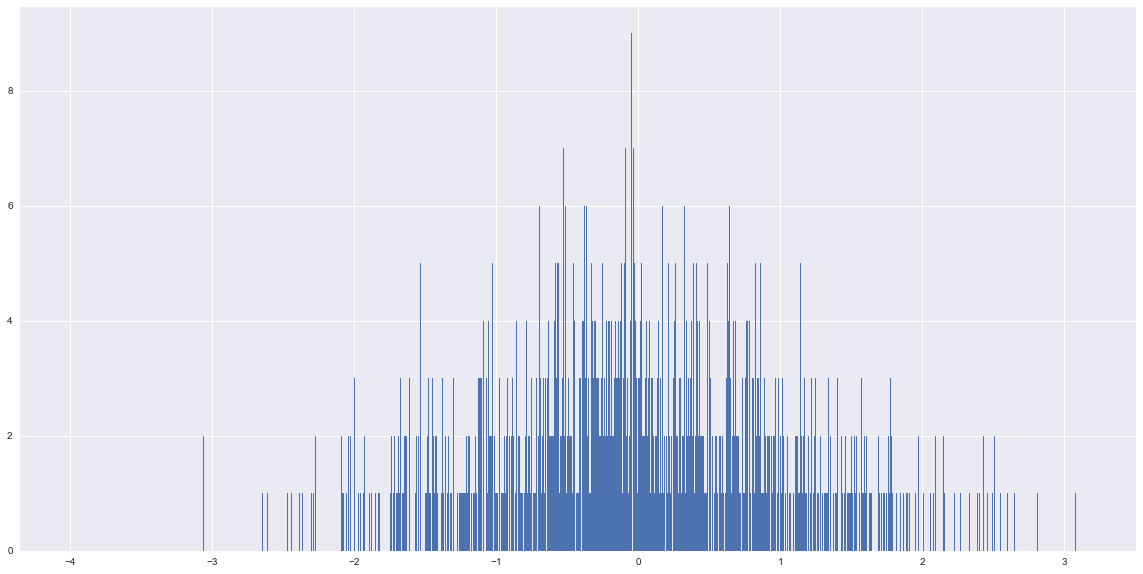

In [65]:
import matplotlib.pyplot as plt

#그래프 세팅 
plt.style.use('seaborn')
fig, ax = plt.subplots(figsize=(20,10))

#데이터 만들기
temp = 2000
random_value = np.random.randn(temp)
ax.hist(random_value, bins = temp,)
print(random_value.shape)


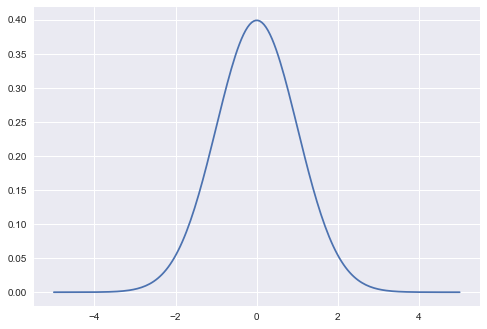

In [69]:
#일반적인 정규분포
normal = np.random.normal(size=(10,20))
x = np.linspace(-5,5,200)
y = (1/np.sqrt(2*np.pi)) * np.exp(-x**2/2)
plt.plot(x,y)

In [71]:
uniform = np.random.uniform(low = 0, high = 1, size = (1,10))
print(uniform)

[[0.55049145 0.23339353 0.20775282 0.29639169 0.93661423 0.63325644
  0.23480572 0.35757688 0.12721497 0.5595157 ]]


In [72]:
#배열의 메타 데이터
random1 = np.random.randint(1,10)
random2 = np.random.randint(1,10)
a = np.random.normal(loc = 0, scale = 2, size = (random1,random2))

#ndarray. ndim, shape, size
print(a)
print(a.ndim)
print(a.shape)
print(a.size) #a.shape[0] * a.shape[1] * ....

[[-1.2194214  -0.9341559   2.00843293  3.12603328  0.63241208 -2.42984161
   1.47489784  0.17476085]
 [ 2.8820975   2.12387451 -0.44744702 -0.31217938 -2.36217454  1.99667084
   2.90149543  0.32399006]]
2
(2, 8)
16
